# Clasificar ropa
Este notebook de ejemplo mostrará cómo crear una CNN para el dataset Fashion MNIST.

## Consiguiendo los datos
Los datos pueden obtenerse desde keras. Las imágenes están preparadas para una rápida implementación, pues son del mismo tamaño y son pequeñas.

In [1]:
from keras.datasets import fashion_mnist

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Se puede ver que las imágenes son de 28 pixeles, lo que permite un rápido entrenamiento.


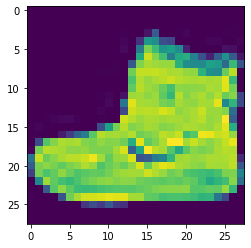

In [9]:
plt.imshow(X_train[0])

Las etiquetas se encuentran en números así que se necesita aplicar one hot enconding para que cada categoría se convierta en un valor binario.

In [10]:
y_train[0]

9

## Preprocesado

Normalizamos los datos de las imágenes. Deben tener valores entre cero y uno.

In [17]:
X_train.max()

255

In [19]:
X_train = X_train/255

In [20]:
X_train.max()

1.0

Se hace lo mismo con los datos de prueba.

In [21]:
X_test = X_test/255


### Redimensionando para ingresarlo en la red
La red neuronal necesita la información de los canales de colores, así que hay que redimensionar la matriz de entrenamiento.

In [22]:
import numpy as np

In [23]:
np.shape(X_train)

(60000, 28, 28)

In [25]:
X_train = np.reshape(X_train,(60000,28,28,1))

Se hace lo mismo para los datos de prueba.

In [26]:
np.shape(X_test)

(10000, 28, 28)

In [27]:
X_test = np.reshape(X_test,(10000,28,28,1))

### One hot coding para clasificación
Cada categoría debe ser una opción binaria, si no, la red pensará que una categoría vale más que otra porque su número es más grande. Los datos dejan de ser números naturales, para volverse nuevas columnas en el dataset.

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_cat_train = to_categorical(y_train)

In [33]:
y_cat_test = to_categorical(y_test)

Se puede ver el cambio en los diez primeros datos de entrenamiento.

In [35]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [34]:
y_cat_train[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## Construir el modelo

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [41]:
# se crea un modelo secuencial
model = Sequential()
#capa de entrada
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#max pool
model.add(MaxPooling2D(pool_size=(2,2)))
#se aplana la imagen
model.add(Flatten())
#red neuronal
model.add(Dense(units=128,activation='relu'))
#capa de salida
model.add(Dense(units=10,activation='softmax'))
#compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento

In [43]:
model.fit(X_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4004 - accuracy: 0.8580
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2793 - accuracy: 0.8993
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2415 - accuracy: 0.9135
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2173 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1995 - accuracy: 0.9292
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1866 - accuracy: 0.9346
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1745 - accuracy: 0.9386
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1648 - accuracy: 0.9417
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1543 - accuracy: 0.9454
Epoch 10/10
1875/1875 [==============================] - 35s 19m

## Evaluación

El modelo obtuvo buenos resultados aprendiendo a clasificar estas prendas.

In [46]:
model.metrics_names

['loss', 'accuracy']

In [44]:
model.evaluate(X_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3169 - accuracy: 0.9081


[0.31694483757019043, 0.9081000089645386]

Se puede verificar su eficacia utilizando otros parámetros de sklearn.

In [47]:
from sklearn.metrics import classification_report

Se obtiene la categoría predicha por el modelo.

In [55]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.86      0.85      1000
           3       0.93      0.90      0.91      1000
           4       0.82      0.88      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.79      0.69      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Los resultados son bastante buenos, pues obtiene puntuaciones mayores a 0.7 en cada métrica utilizada.

## Guardar el modelo

In [57]:
model.save('fmnist.h5')